# Titanic Dataset Analysis

Objective
    - Build a Model that can predict the survival rate of the passengers on the Titanic
    - The Output Variable is the survived column

In [1]:
# shift-tab to show docstring: highlight and shift-tab: format
#?zip()
#%lsmagic
# Suppress Future Warnings
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

# Data Importing

In [2]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib
import platform

message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Scikit-learn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Matplotlib version={}".format(matplotlib.__version__))
print("Python version={}".format(platform.python_version()))

************************
        Versions        
************************
Scikit-learn version=0.22.2.post1
Numpy version=1.16.5
Pandas version=0.25.1
Matplotlib version=3.1.1
Python version=3.7.4


In [3]:
# Lets use all the libraries that we need
import numpy as np
import pandas as pd
from sklearn import datasets 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Lets read the titanic dataset and read the first 5 result
titanic = pd.read_csv("train.csv")
titanic.head(5)
titanic.shape

(897, 12)

In [5]:
# Lets read the titanic test dataset we are going to test with our model
titanictest = pd.read_csv("test.csv")
titanictest.head(5)
titanictest.shape

(412, 11)

# Explatory Data Analysis



In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897 entries, 0 to 896
Data columns (total 12 columns):
PassengerId    897 non-null int64
Survived       897 non-null int64
Pclass         897 non-null int64
Name           897 non-null object
Sex            897 non-null object
Age            724 non-null float64
SibSp          897 non-null int64
Parch          897 non-null int64
Ticket         897 non-null object
Fare           897 non-null float64
Cabin          212 non-null object
Embarked       895 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 84.2+ KB


In [7]:
# Lets list the missing values in train dataset
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            173
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          685
Embarked         2
dtype: int64

As you can see that there are 173 missing values in Age and 685 missing values in Cabin and 2 missing values in the Embarked columns

As you can see that Cabin has the most missing values so we need to do an extensive preparation,the others can be done more easily

# Barchart for (Pclass,Sex,SibSp,Parch and Embarked)

        Survived
Pclass          
1       0.638767
2       0.450262
3       0.244259


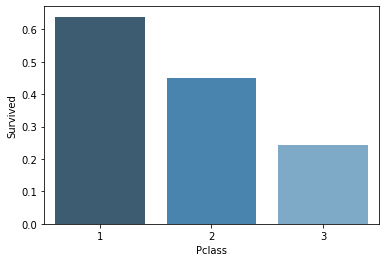

In [8]:
# Lets visualise survival rate by some of the important variables
#Lets look at the survival rate by Pclass
print(titanic.groupby('Pclass')[['Survived']].mean())
sns.barplot(x='Pclass',y='Survived',data=titanic,ci= None,palette="Blues_d")

From this barplot,it can be seen that people from the first class has a higher chance of survival than people from the third class.

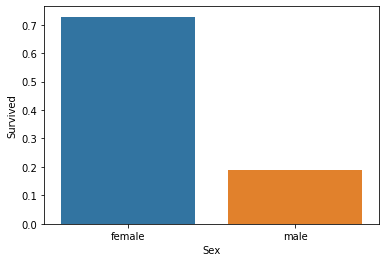

In [9]:
# Lets look at the survival rate by sex
titanic.groupby('Sex')[['Survived']].mean()
# Lets visualize this with a barchart
sns.barplot(x='Sex',y='Survived',data=titanic,ci= None)

From this we can see that female has a higher survival rate than males in the titanic

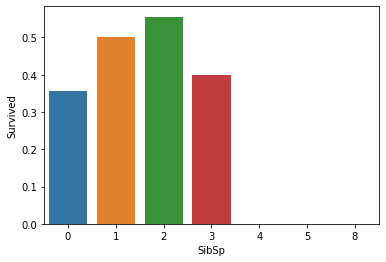

In [10]:
# Survival rate by Sibsp
titanic.groupby('SibSp')[['Survived']].mean()
#Visualise the data
sns.barplot(x='SibSp',y='Survived',data=titanic,ci= None)

From this people who had 2 or more siblings or spouse more likely survived than those who had no siblings or spouse on the titanic

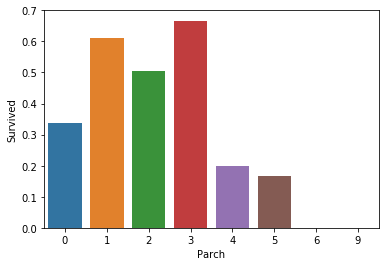

In [11]:
# Survival rate by Parch
titanic.groupby('Parch')[['Survived']].mean()
#Visualise the data
sns.barplot(x='Parch',y='Survived',data=titanic,ci= None)

From this i can see that people who had boarded with more than 1 parent or child more likely survived than those who had boarded alone

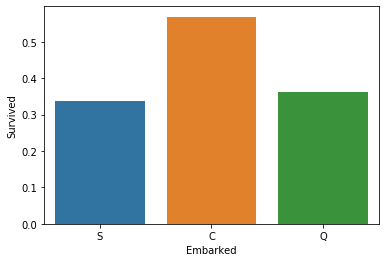

In [12]:
# Survival rate by town of embarkement
titanic.groupby('Embarked')[['Survived']].mean()
#Visualise the data
sns.barplot(x='Embarked',y='Survived',data=titanic,ci= None)

From this we can see that,passengers who embarked from C(Cherbough) more likely survived than those who embarked from S(Southampton)

We have done barchart on some important variables such as (Pclass,Sex,SibSp,Parch,Embarked) and have extracted useful information on the titanic dataset

# Data Preparation

## Lets Extract Useful Information from The Name Column

### From the name column the title can be extracted which can contribute the survival rate

In [13]:
titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)
titanic['Title'].value_counts()

Mr          508
Miss        176
Mrs         149
Master       42
Dr            6
Rev           5
Col           3
Capt          1
Lady          1
Countess      1
Ms            1
Major         1
Mme           1
Mlle          1
Jonkheer      1
Name: Title, dtype: int64

In [14]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3,"Mme": 3,"Capt": 3}
titanic['Title'] = titanic['Title'].map(title_mapping)

In [15]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,2
1,2,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0
2,3,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,1
3,4,1,1,"Bird, Miss. Ellen",female,29.0,0,0,PC 17483,221.7792,C97,S,1
4,5,0,1,"Birnbaum, Mr. Jakob",male,25.0,0,0,13905,26.0000,NaN,C,0


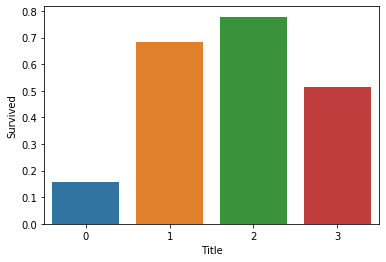

In [16]:
# Visualise the r/s between Title and Survived
titanic.groupby('Title')[['Survived']].mean()
#Visualise the data
sns.barplot(x='Title',y='Survived',data=titanic,ci= None)

### From this i can see that people who were females and have special titles had better survival rate than the male without any special title

## Lets remove all the redudant columns

In [17]:
# Finally lets remove all unneccessary columns
titanic=titanic.drop(['Name','Ticket','PassengerId'],axis=1)
titanic.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,1,female,47.0,1,1,52.5542,D35,S,2
1,1,1,male,26.0,0,0,30.0000,C148,C,0
2,1,1,female,42.0,0,0,227.5250,NaN,C,1


# Handle the missing values in the Dataset

### Age

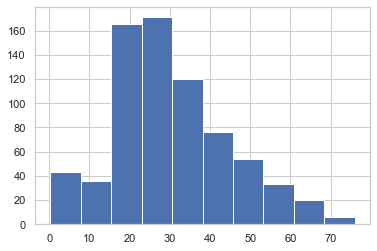

In [18]:
# Age has some missing values that can be filled with the median value
# But first lets visualise the distribution of age in the dataset
sns.set(style="whitegrid")
titanic['Age'].hist(bins=10)

In [19]:
# As you can see that most of the people aboard the titanic are between 20 and 30 
# I will find the mean age and fill the missing values with it
titanic["Age"].fillna(titanic.groupby("Title")["Age"].transform("median"), inplace=True)
model_mean_age = titanic['Age'].median()
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Title
count,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000
mean,0.387960,2.280936,29.754738,0.519509,0.416945,34.311148,0.742475
std,0.487557,0.841982,13.331496,1.091724,0.901426,52.446742,0.976002
min,0.000000,1.000000,0.333300,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,22.000000,0.000000,0.000000,7.925000,0.000000
50%,0.000000,3.000000,29.000000,0.000000,0.000000,15.050000,0.000000
75%,1.000000,3.000000,36.000000,1.000000,0.000000,31.387500,1.000000
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200,3.000000


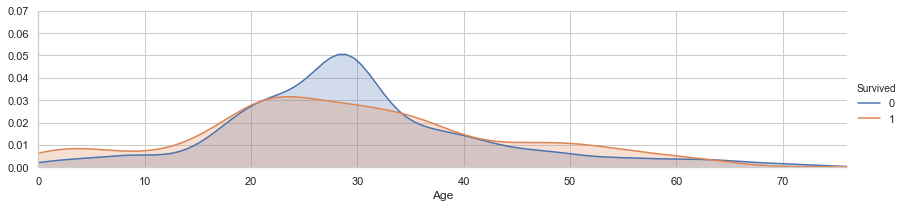

In [20]:
# Visual of which age had a better survival rate
facet = sns.FacetGrid(titanic, hue="Survived",aspect= 4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic['Age'].max()))
facet.add_legend()
plt.ylim(0, 0.07)
plt.show()

### From the kdeplot i can see that the passengers who were of a younger age between (0 and 10) had a better survival rate than those who were older.

### Embarked

In [21]:
# 2 missing values in the embarked
# use the most frequent embarked town to replace it
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
model_embarked_mode = titanic['Embarked'].mode()[0]
titanic.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,1,female,47.0,1,1,52.5542,D35,S,2
1,1,1,male,26.0,0,0,30.0000,C148,C,0


### Cabin

#### For Cabin lets extract the first letter of the Cabin as it indicates the Deck of the Ship which was important to the survival rate

In [22]:
# Lets filled the Nan values in Cabin with 'U' for Unknown
titanic['Cabin'] = titanic['Cabin'].fillna('U')
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,1,female,47.0,1,1,52.5542,D35,S,2
1,1,1,male,26.0,0,0,30.0000,C148,C,0
2,1,1,female,42.0,0,0,227.5250,U,C,1
3,1,1,female,29.0,0,0,221.7792,C97,S,1
4,0,1,male,25.0,0,0,26.0000,U,C,0


In [23]:
# Lets extract the first letter of the Cabin
titanic['Cabin'] = titanic['Cabin'].map(lambda x: x[0])
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,1,female,47.0,1,1,52.5542,D,S,2
1,1,1,male,26.0,0,0,30.0000,C,C,0
2,1,1,female,42.0,0,0,227.5250,U,C,1
3,1,1,female,29.0,0,0,221.7792,C,S,1
4,0,1,male,25.0,0,0,26.0000,U,C,0


In [24]:
# Lets see the value counts for cabin
titanic['Cabin'].value_counts()

U    685
C     66
B     49
D     34
E     28
F     15
A     15
G      4
T      1
Name: Cabin, dtype: int64

In [25]:
# Lets Drop Cabin T as it only has one value
titanic = titanic[titanic.Cabin != 'T']
titanic['Cabin'].value_counts()

U    685
C     66
B     49
D     34
E     28
F     15
A     15
G      4
Name: Cabin, dtype: int64

# Coverting all Categorical Features into Numerical Form

In [26]:
titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
Title         int64
dtype: object

In [27]:
# Get list of numeric and nonnumeric variables
numvars = list(titanic.columns[titanic.dtypes != "object"])
nonnumvars = list(titanic.columns[titanic.dtypes == "object"])
print(numvars)
print(nonnumvars)

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Title']
['Sex', 'Cabin', 'Embarked']


In [28]:
#Print the unique values in the nonnumeric columns before encoding
print(titanic['Sex'].unique())
print(titanic['Embarked'].unique())
print(titanic['Cabin'].unique())

['female' 'male']
['S' 'C' 'Q']
['D' 'C' 'U' 'B' 'A' 'E' 'F' 'G']


In [29]:
# Encode all the categorical variables
titanicdf = pd.get_dummies(titanic,columns=nonnumvars)
titanicdf.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
0,1,1,47.0,1,1,52.5542,2,1,0,0,0,0,1,0,0,0,0,0,0,1
1,1,1,26.0,0,0,30.0000,0,0,1,0,0,1,0,0,0,0,0,1,0,0


In [30]:
# Now that we have finally prepare our Train Data lets see the r/s to survival rate
# Since all values are numeric, do a correction and sort to determine
# the most important features relative to Survived
corr = titanicdf.corr()
corr.sort_values(["Survived"], ascending = False, inplace = True)
print(corr.Survived)

Survived      1.000000
Sex_female    0.533480
Title         0.451396
Fare          0.260215
Embarked_C    0.186507
Cabin_B       0.170898
Cabin_C       0.161003
Cabin_D       0.117388
Cabin_E       0.106933
Parch         0.083183
Cabin_F       0.074500
Cabin_A       0.020956
Cabin_G       0.015334
Embarked_Q   -0.016634
Age          -0.019778
SibSp        -0.044035
Embarked_S   -0.154369
Cabin_U      -0.318680
Pclass       -0.343841
Sex_male     -0.533480
Name: Survived, dtype: float64


# Train Model

# Split the Data into Train and Test Sets

In [31]:
from sklearn.model_selection import train_test_split
Y = titanicdf["Survived"].values
X = titanicdf.drop(["Survived"],axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)


# Training Model With Algorithms

## Train Model with Algorithm: Logistics Regression and Training Accuracy

In [32]:
# Train Model with Logistics Regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,Y_train)
log_training=round(log.score(X_train,Y_train)*100,2)
# print('Logistic Regression Training Accuracy Score:',log)

## Train Model with Algorithm: K-Nearest Kneighbors and Training Accuracy

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
knn_training = round(knn.score(X_train,Y_train)*100,2)
# print('KNN Training Accuracy Score: ',knn)

## Train Model with Algorithm: SVC(Linear Kernel) and Training Accuracy

In [34]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train,Y_train)
svc_training = round(svc.score(X_train,Y_train)*100,2)
# print('SVC Training Accuracy Score: ',svc)

## Train Model with Algorithm: Decision Tree and Training Accuracy

In [35]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,Y_train)
tree_training =round(tree.score(X_train,Y_train)*100,2)
# print('Descision Tree Training Accuracy Score: ',tree)

## Train Model with Algorithm: Random Forest Classifier and Training Accuracy

In [36]:
from sklearn.ensemble import RandomForestClassifier
# oob score is used later in the hyperparameter tuning
forest = RandomForestClassifier(n_estimators=100,oob_score = True)
forest.fit(X_train,Y_train)
forest_training = round(forest.score(X_train,Y_train)*100,2)
# print('Random Forest Classifier Training Accuracy Score: ',tree)

## Table of Training Accuracy Score by Algorithms

In [37]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVC(Linear Kernel)', 
              'Decision Tree','Random Forest'
              ],
    'Training Accuracy Score': [log_training,knn_training,svc_training,tree_training,forest_training]})
result_df = results.sort_values(by='Training Accuracy Score', ascending=False)
result_df = result_df.set_index('Training Accuracy Score')
result_df.head(9)

,Model
Training Accuracy Score,
98.46,Decision Tree
98.46,Random Forest
84.92,KNN
82.96,Logistic Regression
81.56,SVC(Linear Kernel)


# Score and Evaluate Model


## Score Model and Evaluate Model with:  Logistics Regression 

In [38]:
# score model for test set
Y_hat= log.predict(X_test)

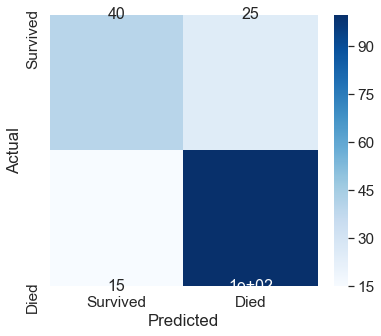

In [39]:
from sklearn.metrics import confusion_matrix
# evaluate model for test set
class_names=["Survived","Died"]
cm = confusion_matrix(Y_test, Y_hat, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4)#for label size
ax=sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size


In [40]:
# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, Y_hat)
log_score= score*100
print("Accuracy score for the test set = {:.2f}%".format(log_score))

Accuracy score for the test set = 77.78%


## Score Model and Evaluate Model with:  K-Nearest Neighbors

In [41]:
# score model for test set
Y_hat= knn.predict(X_test)

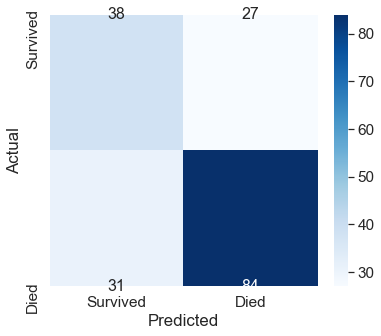

In [42]:
from sklearn.metrics import confusion_matrix
# evaluate model for test set
class_names=["Survived","Died"]
cm = confusion_matrix(Y_test, Y_hat, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4)#for label size
ax=sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [43]:
# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, Y_hat)
knn_score = score*100
print("Accuracy score for the test set = {:.2f}%".format(knn_score))

Accuracy score for the test set = 67.78%


## Score Model and Evaluate Model with:  SVC(Linear Kernel)

In [44]:
# score model for test set
Y_hat= svc.predict(X_test)

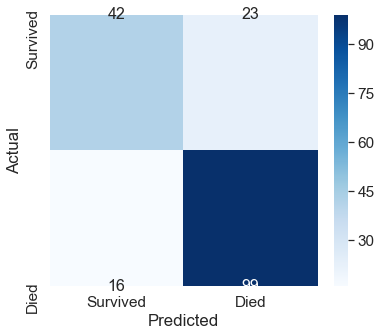

In [45]:
from sklearn.metrics import confusion_matrix
# evaluate model for test set
class_names=["Survived","Died"]
cm = confusion_matrix(Y_test, Y_hat, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4)#for label size
ax=sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [46]:
# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, Y_hat)
svc_score = score*100
print("Accuracy score for the test set = {:.2f}%".format(svc_score))

Accuracy score for the test set = 78.33%


## Score Model and Evaluate Model with:  Decision Tree

In [47]:
# score model for test set
Y_hat= tree.predict(X_test)

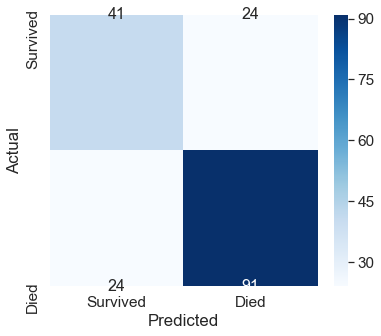

In [48]:
from sklearn.metrics import confusion_matrix
# evaluate model for test set
class_names=["Survived","Died"]
cm = confusion_matrix(Y_test, Y_hat, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4)#for label size
ax=sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [49]:
# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, Y_hat)
tree_score = score*100
print("Accuracy score for the test set = {:.2f}%".format(tree_score))

Accuracy score for the test set = 73.33%


## Score Model and Evaluate Model with: Random Forest Classfier

In [50]:
# score model for test set
Y_hat= forest.predict(X_test)

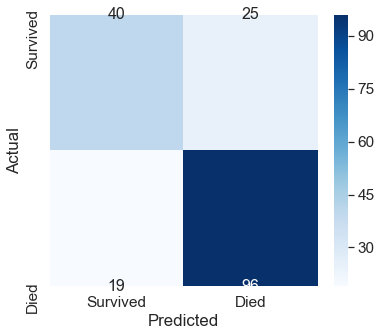

In [51]:
from sklearn.metrics import confusion_matrix
# evaluate model for test set
class_names=["Survived","Died"]
cm = confusion_matrix(Y_test, Y_hat, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4)#for label size
ax=sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [52]:
# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, Y_hat)
forest_score = score*100
print("Accuracy score for the test set = {:.2f}%".format(forest_score))

Accuracy score for the test set = 75.56%


## Table of Accuracy Score for the Test set

In [53]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVC(Linear Kernel)', 
              'Decision Tree','Random Forest'
              ],
    'Accuracy Score for the Test Set': [log_score,knn_score,svc_score,tree_score,forest_score]})
result_df = results.sort_values(by='Accuracy Score for the Test Set', ascending=False)
result_df = result_df.set_index('Accuracy Score for the Test Set')
result_df.head()

,Model
Accuracy Score for the Test Set,
78.333333,SVC(Linear Kernel)
77.777778,Logistic Regression
75.555556,Random Forest
73.333333,Decision Tree
67.777778,KNN


### From the Accuracy Score for Training  and The Accuracy Score for the Test set, I have chosen to use the Random Forest Classifier

#  Importance of Features in Random Forest

In [54]:
forest 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

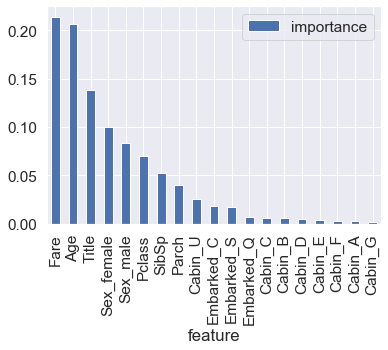

In [55]:
features = pd.DataFrame({'feature':titanicdf.iloc[:,1:20].columns,'importance':np.round(forest.feature_importances_,3)})
features = features.sort_values('importance',ascending=False).set_index('feature')
features.plot.bar()

# Hyperparameter Tuning

In [56]:
# Lets find the oob score of our Random Forest Classifier to compare before hyperparameter tuning and after
#Out of bag (OOB) score is a way of validating the Random forest model accurately
print("oob score for the Random Forest Classifier :", round(forest.oob_score_, 4)*100, "%")

oob score for the Random Forest Classifier : 81.56 %


Lets tune the hyperparameter for the Random Forest Classifier

In [57]:
# from sklearn.model_selection import GridSearchCV
# param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)] }
# rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
# clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
# clf.fit(X_train, Y_train)
# clf.best_params_
print({'criterion': 'entropy',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100})

{'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}


In [58]:
from sklearn.metrics import accuracy_score
new_forest =  RandomForestClassifier(criterion = "entropy",min_samples_leaf = 5,min_samples_split = 2,n_estimators=100,oob_score = True)
new_forest.fit(X_train,Y_train)
print('Random Forest Training Accuracy After Tuning : ',round(new_forest.score(X_train,Y_train)*100,2))  
Y_hat = new_forest.predict(X_test)
test_score = accuracy_score(Y_test,Y_hat)
print('Random Forest Accuracy score for the Test Set After Tuning = "{}"'.format(test_score*100))
print("oob score After Tuning :", round(new_forest.oob_score_, 4)*100, "%")

Random Forest Training Accuracy After Tuning :  86.73
Random Forest Accuracy score for the Test Set After Tuning = "76.11111111111111"
oob score After Tuning : 82.82000000000001 %


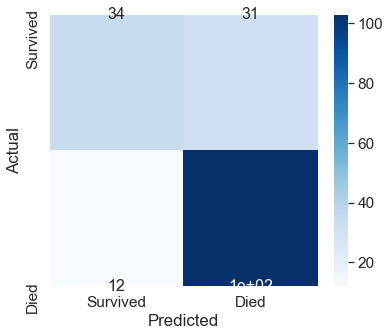

In [59]:
from sklearn.metrics import confusion_matrix
# evaluate model for test set
class_names=["Survived","Died"]
cm = confusion_matrix(Y_test, Y_hat, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4)#for label size
ax=sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size


 ## Since we have tuned our model we can test it using test set

# But Before that we need to Prepare for the Test

### We will use the same preparation that we did on the train dataset

In [60]:
titanictest = pd.read_csv("test.csv")
titanictest.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,6,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,11967,91.0792,B49,C
1,8,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S
2,9,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,28.0,0,0,110564,26.5500,C52,S
3,12,1,"Bonnell, Miss. Caroline",female,30.0,0,0,36928,164.8667,C7,S
4,14,1,"Borebank, Mr. John James",male,42.0,0,0,110489,26.5500,D22,S


In [61]:
 titanictest.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             90
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          329
Embarked         0
dtype: int64

In [62]:
titanictest['Title'] = titanictest['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)
titanictest['Title'].value_counts()

Mr        249
Miss       84
Mrs        48
Master     19
Rev         3
Dr          2
Ms          1
Sir         1
Don         1
Major       1
Col         1
Dona        1
Mlle        1
Name: Title, dtype: int64

In [63]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Dona": 3,
                 "Ms": 3, "Don": 3, "Sir":3}
titanictest['Title'] = titanictest['Title'].map(title_mapping)

In [64]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,1,female,47.0,1,1,52.5542,D,S,2
1,1,1,male,26.0,0,0,30.0000,C,C,0
2,1,1,female,42.0,0,0,227.5250,U,C,1
3,1,1,female,29.0,0,0,221.7792,C,S,1
4,0,1,male,25.0,0,0,26.0000,U,C,0


In [65]:
# titanictest['Age'].fillna(titanic['Age'].mean(), inplace=True)
# model_mean_age = titanictest['Age'].mean()
titanictest["Age"].fillna(titanictest.groupby("Title")["Age"].transform("median"), inplace=True)
model_mean_age = titanictest['Age'].median()
# Fill in the missing value for Fare
titanictest["Fare"].fillna(titanictest.groupby("Pclass")["Fare"].transform("median"), inplace=True)
# titanictest['Fare'].fillna(titanic['Fare'].mean(), inplace=True)
titanictest.describe()



,PassengerId,Pclass,Age,SibSp,Parch,Fare,Title
count,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,669.689320,2.325243,28.672735,0.453883,0.315534,31.022532,0.662621
std,377.339961,0.828943,12.635105,0.922975,0.778327,50.167595,0.954060
min,6.000000,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,361.250000,2.000000,21.000000,0.000000,0.000000,7.847950,0.000000
50%,694.500000,3.000000,29.500000,0.000000,0.000000,13.000000,0.000000
75%,985.000000,3.000000,34.000000,1.000000,0.000000,28.050000,1.000000
max,1305.000000,3.000000,80.000000,8.000000,9.000000,512.329200,3.000000


In [66]:
titanictest['Embarked'].fillna(titanictest['Embarked'].mode()[0], inplace=True)
model_embarked_mode = titanictest['Embarked'].mode()[0]
titanictest.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,6,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,11967,91.0792,B49,C,0
1,8,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S,1


In [67]:
titanictest['Cabin'] = titanictest['Cabin'].fillna('U')
titanictest['Cabin'] = titanictest['Cabin'].map(lambda x: x[0])
titanictest['Cabin'].value_counts()
titanic


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,1,female,47.0,1,1,52.5542,D,S,2
1,1,1,male,26.0,0,0,30.0000,C,C,0
2,1,1,female,42.0,0,0,227.5250,U,C,1
3,1,1,female,29.0,0,0,221.7792,C,S,1
4,0,1,male,25.0,0,0,26.0000,U,C,0
...,...,...,...,...,...,...,...,...,...,...
892,1,1,female,26.0,0,0,78.8500,U,S,1
893,1,1,female,50.0,0,1,247.5208,B,C,2
894,1,1,female,32.0,0,0,76.2917,D,C,1
895,0,1,male,36.0,0,0,75.2417,C,C,0


In [68]:
titanictestdf=titanictest.drop(['Name','Ticket','PassengerId'],axis=1)
titanictestdf.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,male,25.0,1,0,91.0792,B,C,0
1,1,female,35.0,0,0,135.6333,C,S,1
2,1,male,28.0,0,0,26.5500,C,S,0


In [69]:
titanictestdf.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
Title         int64
dtype: object

In [70]:
# Get list of numeric and nonnumeric variables
numvars = list(titanictestdf.columns[titanictestdf.dtypes != "object"])
nonnumvars = list(titanictestdf.columns[titanictestdf.dtypes == "object"])
print(numvars)
print(nonnumvars)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Title']
['Sex', 'Cabin', 'Embarked']


In [71]:
# Ensure there are no missing value in the test dataset
titanictestdf.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
Title       0
dtype: int64

In [72]:
# Encode all the categorical variables
predictdf = pd.get_dummies(titanictestdf,columns=nonnumvars)
predictdf.head(2)

,Pclass,Age,SibSp,Parch,Fare,Title,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
0,1,25.0,1,0,91.0792,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1,1,35.0,0,0,135.6333,1,1,0,0,0,1,0,0,0,0,0,0,0,1


In [73]:
Xp = predictdf.values
Xp[:2]

array([[  1.    ,  25.    ,   1.    ,   0.    ,  91.0792,   0.    ,
          0.    ,   1.    ,   0.    ,   1.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    ,   1.    ,   0.    ,
          0.    ],
       [  1.    ,  35.    ,   0.    ,   0.    , 135.6333,   1.    ,
          1.    ,   0.    ,   0.    ,   0.    ,   1.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          1.    ]])

## Prediction with Random Forest Classifier Trained Model

In [74]:
yp_hat = new_forest.predict(Xp)

In [75]:
dfout = pd.DataFrame() 
dfout[["PassengerId"]] = titanictest[["PassengerId"]]
dfout["Survived"] = yp_hat
dfout[:5]

,PassengerId,Survived
0,6,0
1,8,1
2,9,0
3,12,1
4,14,0


In [76]:
dfout.to_csv("submission.csv",index=False)

# Conclusions

###  How is your prediction task defined? And what is the meaning of the output variable?

#### The Prediction task is to build a model to predict which passengers survived the titanic.The output variable is the survived which refers to the passengers who survived the titanic sinking.

### How do you represent the data as features?

#### The features are the columns that contains impotant information that can help us with the prediction.I represented the data by using the  (Pclass,Age,Cabin,Sex,SibSp,Parch,Embarked,Fare and Title)

### Did you process the features in any way?

#### For the title,i extracted it from the name column as the title of a person could have a impact on their survival rate,The PassengerId,Name,Ticket were dropped as it did not have any significant information,I also filled in the missing values for age by filling it with the mean age,I filled the missing value of cabin by stating whether they had a cabin or not and i filled the embarked column with the most frequent emabrkation point

###  Did you bring in any additional sources of data?

####  Yes,i created barchart and a kdeplot for the survival rate against the features and brought in background information about the titanic.

###  How did you select which learning algorithms to use?

#### I tried a variety of classification algorithm and compared the training accuracy and test accuracy to see the difference and decide which is the better learning algorithms

###  Did you try to tune the hyperparameters of the learning algorithm, and in that case how?

#### I used gridsearchcv to find the best parameters that can be used for the Random Forest Classifier that i have chosen and i used the oob score before the tuning and after to see the difference in score

###  How do you evaluate the quality of your system?

#### I evaluate the quality of the system by looking at the training accuracy and accuracy score for the test set among a few different algorithms.Since the RandomForest Classifier had a high score in both i chose it.

### How well does your system compare to a stupid baseline?

#### My system is significantly better than the stupid baseline as the stupid baseline predicts that everyone in the titanic died while my system predicts the survival of the passengers according to the features and variables.

### How do you evaluate the quality of your system?

### Is it possible to say something about which features the model considers important? (Whether this is possible depends on the type of classifier you are using)

#### Yes by using  X.feature_importance where x is your training algorithm. For the Random Forest Classifier that i was using the most important features were (Fare,Age,Title and Sex_Female which refers to the female passengers on the titanic).

### Can you say anything about the errors that the system makes? For a classification task, you may consider a confusion matrix.

#### From my confusion matrix it predicted 51 as the true positive,15 as the false positive,15 as false negative and 99 as true negative,meaning that it predicted 15 passengers died but it was false and predicted 15 passengers survived but it is also false.

### Is it possible to say something about which features the model considers important? (Whether this is possible depends on the type of classifier you are using)

#### Yes,my model considers Age,Fare and Title as the three most important feature which means that they play a very important role in my model's prediction.

# References

## Tutorials
- [Predicting the Survival of Titanic Passengers](https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8)
- [Machine Learning with the Titanic Dataset](https://towardsdatascience.com/machine-learning-with-the-titanic-dataset-7f6909e58280)
- [Titanic Survival Prediction Using Machine Learning](https://medium.com/better-programming/titanic-survival-prediction-using-machine-learning-4c5ff1e3fa16)

## Video
- [Kaaggle-Titanic Solution by Minsuk Heo](https://www.youtube.com/watch?v=3eTSVGY_fIE)


